In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())

X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values


X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_val.shape[0]))

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


--2023-11-21 17:23:40--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: 'daily-bike-share.csv.4'

     0K .......... .......... .......... .......... .......   100%  231K=0.2s

2023-11-21 17:23:41 (231 KB/s) - 'daily-bike-share.csv.4' saved [48800/48800]



Try Another Linear Algorithm

Let's try training our regression model by using a **Lasso** algorithm. We can do this by just changing the estimator in the training code.

mse: 201155.70593338404
rmse 448.5038527519959
r score: 0.6056468637824488


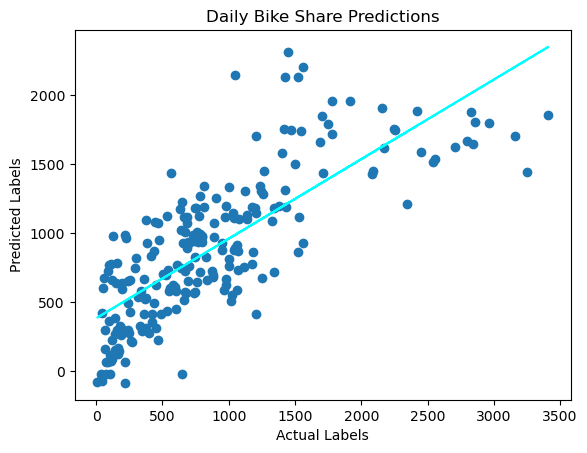

In [3]:
from sklearn.linear_model import Lasso

# estimator
model = Lasso()
model.fit(X_train,y_train)

#prediction
predictions = model.predict(X_val)

#metrics
mse = mean_squared_error(y_val,predictions)
print('mse:',mse)

rmse = np.sqrt(mse)
print('rmse',rmse)

r2 = r2_score(y_val,predictions)
print('r score:',r2)

# Plot predicted vs actual
plt.scatter(y_val,predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# overlay the regression line
z = np.polyfit(y_val,predictions,1)
p = np.poly1d(z)
plt.plot(y_val,p(y_val),color='cyan')
plt.show()

Trying with a Decision Tree Algorithm

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model2 = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model2)
print(tree)

Lasso() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_7 <= 0.26
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |   |--- feature_7 >  0.26
|   |   |   |   |   |   |--- feature_8 <= 0.36
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |   |--- feature_8 >  0.36
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |   |--- feature_6 <= 0.28
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |   |--- feature_6 >  0.28
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |--- feature_8 >  0.40
|   |   |   |   |   |   |--- feature_3 <= 3.00
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_3 >  3.00
|   |   |   |   |   |   |   |--- value: [532.00]
|  

mse: 255175.4909090909
rmse 505.1489789251196
r score: 0.4997444658160569


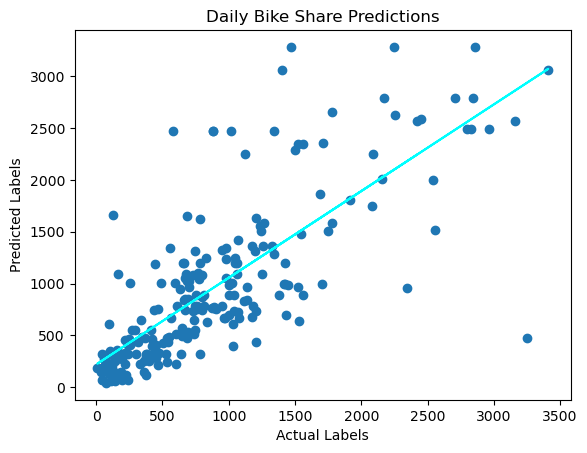

In [5]:
predictions = model2.predict(X_val)

#metrics
mse = mean_squared_error(y_val,predictions)
print('mse:',mse)

rmse = np.sqrt(mse)
print('rmse',rmse)

r2 = r2_score(y_val,predictions)
print('r score:',r2)

# Plot predicted vs actual
plt.scatter(y_val,predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# overlay the regression line
z = np.polyfit(y_val,predictions,1)
p = np.poly1d(z)
plt.plot(y_val,p(y_val),color='cyan')
plt.show()

Try an Ensemble Algorithm

mse: 105290.01411227272
rmse 324.4842278328374
r score: 0.7935855357177118


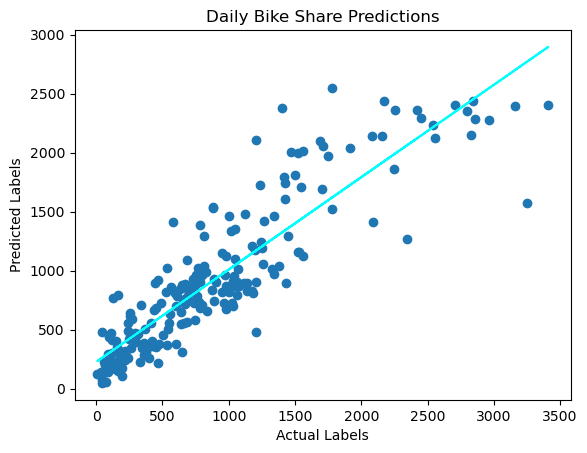

In [6]:
from sklearn.ensemble import RandomForestRegressor

# estimator
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)

#prediction
predictions = model3.predict(X_val)

#metrics
mse = mean_squared_error(y_val,predictions)
print('mse:',mse)

rmse = np.sqrt(mse)
print('rmse',rmse)

r2 = r2_score(y_val,predictions)
print('r score:',r2)

# Plot predicted vs actual
plt.scatter(y_val,predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# overlay the regression line
z = np.polyfit(y_val,predictions,1)
p = np.poly1d(z)
plt.plot(y_val,p(y_val),color='cyan')
plt.show()

For good measure, let's also try a *boosting* ensemble algorithm.

mse: 104204.13033119454
rmse 322.80664542601124
r score: 0.795714342716494


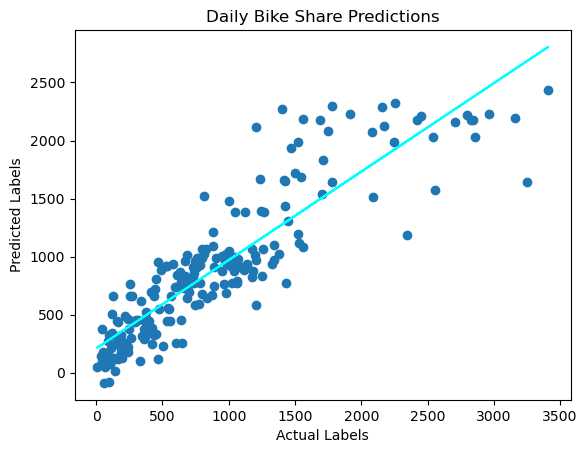

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

# estimator
model4 = GradientBoostingRegressor()
model4.fit(X_train,y_train)

#prediction
predictions = model4.predict(X_val)

#metrics
mse = mean_squared_error(y_val,predictions)
print('mse:',mse)

rmse = np.sqrt(mse)
print('rmse',rmse)

r2 = r2_score(y_val,predictions)
print('r score:',r2)

# Plot predicted vs actual
plt.scatter(y_val,predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# overlay the regression line
z = np.polyfit(y_val,predictions,1)
p = np.poly1d(z)
plt.plot(y_val,p(y_val),color='cyan')
plt.show()